ABDUL RAFAY / 2022F-BSE-197 / LAB 08 / Multi-Class Classification on Iris Dataset:



C:\Users\ABDUL RAFAY\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,979 (11.64 KB)

 Trainable params: 2,979 (11.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3356 - loss: 1.0961 - val_accuracy: 0.6000 - val_loss: 1.0300
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6723 - loss: 1.0184 - val_accuracy: 0.8667 - val_loss: 0.9633
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7350 - loss: 0.9614 - val_accuracy: 0.8667 - val_loss: 0.8872
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8088 - loss: 0.8897 - val_accuracy: 0.8667 - val_loss: 0.8093
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8092 - loss: 0.8235 - val_accuracy: 0.8667 - val_loss: 0.7341
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8036 - loss: 0.7520 - val_accuracy: 0.8667 - val_loss: 0.6527
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8129 - loss: 0.6855 - val_accuracy: 0.9000 - val_loss: 0.5719
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8190 - loss: 0.6197 - val_accuracy: 0.9000 - val_loss: 0.4942


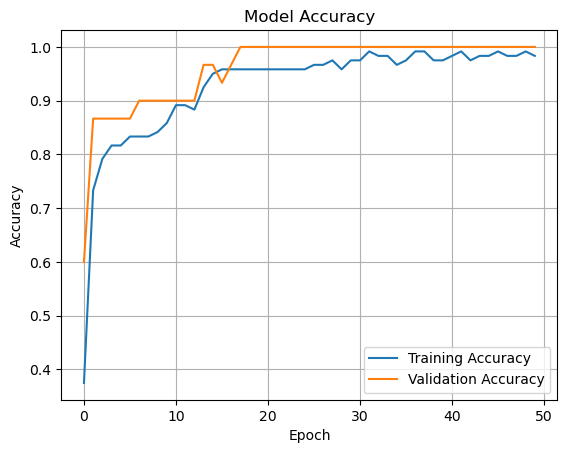

Classification of Iris flower types:  ['setosa' 'versicolor' 'virginica']


In [8]:
#ABDUL RAFAY / 2022F-BSE-197 / LAB 08 / Multi-Class Classification on Iris Dataset:
print("ABDUL RAFAY / 2022F-BSE-197 / LAB 08 / Multi-Class Classification on Iris Dataset:\n")
# Step 1: Import Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
# Step 2: Load Dataset
data = load_iris()
X = data.data  # 4 features
y = data.target.reshape(-1, 1)  # reshape for OneHotEncoder
# Step 3: Encode Target Labels
encoder = OneHotEncoder(sparse_output=False)  # updated argument
y_encoded = encoder.fit_transform(y)
# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# Step 5: Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Step 6: Build the Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes
# Step 7: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Optional: View Model Summary
model.summary()
# Step 8: Train the Model
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)
# Step 9: Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("Loss Value: {:.4f}".format(loss))
# Step 10: Visualize Learning
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
print("Classification of Iris flower types: ",data.target_names)